# Building a Logistic Regression

Create a logistic regression based on the bank data provided. 

The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Note that the first column of the dataset is the index.

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
sns.set()

## Load the data

Load the ‘Example_bank_data.csv’ dataset.

In [13]:
df = pd.read_csv('Example-bank-data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.sample(5)

,duration,y
244,1013,no
278,273,no
140,126,no
456,1019,yes
229,980,yes


We want to know whether the bank marketing strategy was successful, so we need to transform the outcome variable into 0s and 1s in order to perform a logistic regression.

In [14]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [15]:
df.sample(5)

,duration,y
59,360,1
213,256,1
277,143,0
181,141,0
132,316,1


### Declare the dependent and independent variables

In [16]:
y = df['y']
x1 = df['duration']

### Simple Logistic Regression

Run the regression and visualize it on a scatter plot (no need to plot the line).

In [22]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y, x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [23]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Feb 2020   Pseudo R-squ.:                  0.2121
Time:                        09:44:28   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

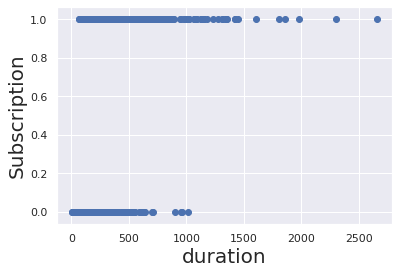

In [24]:
plt.scatter(x1, y, color='C0')
plt.xlabel('duration', fontsize=20)
plt.ylabel('Subscription', fontsize=20)
plt.show()